In [55]:
from data_loading import load_testing_data, get_key
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
# When using a GPU, this command tells the sytem to allow memory allocation expansion
# The program may fail to run if not enough GPU memory is allowcated.
# (Borrowed from class materials: 14-cnn.ipynb)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print(physical_devices[0])
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [57]:
labels, images, labels_dict = load_testing_data()



# train_labels, test_labels = tf.keras.utils.split_dataset(labels, left_size=0.75, shuffle=False, seed=None)
# train_images, test_images = tf.keras.utils.split_dataset(images, left_size=0.75, shuffle=False, seed=None)

In [58]:
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.33, random_state=42)
images_train = (np.expand_dims(images_train, axis=-1)/255.).astype(np.float32)
labels_train = np.array((labels_train)).astype(np.int64)
images_test = (np.expand_dims(images_test, axis=-1)/255.).astype(np.float32)
labels_test = np.array((labels_test)).astype(np.int64)

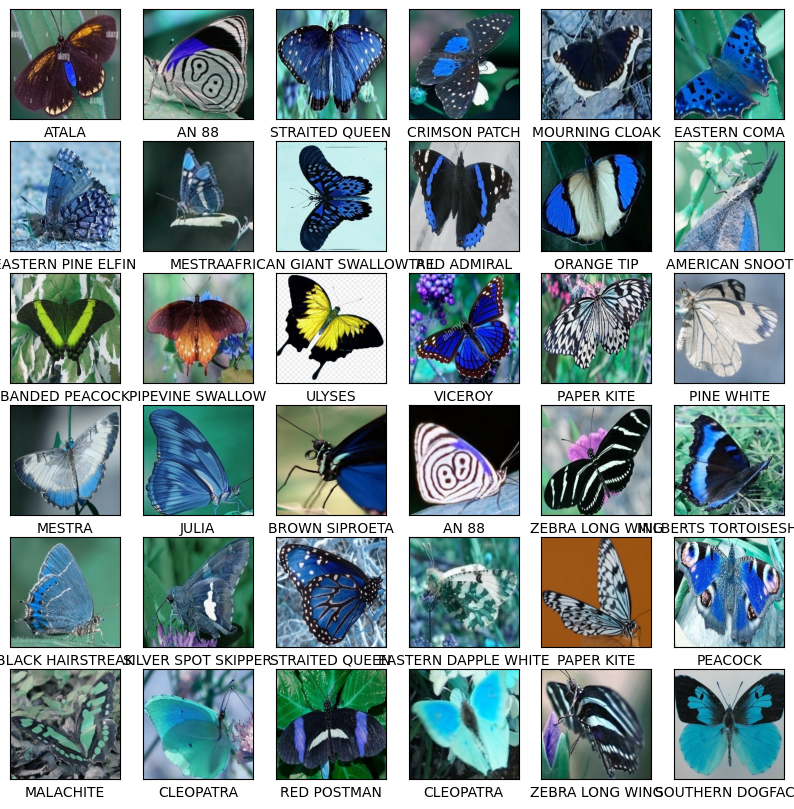

In [59]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(1000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(get_key(train_labels[image_ind], labels_dict))

In [60]:
def build_cnn_model():
    cnn_model = tf.keras.models.Sequential()

    # Define the first convolutional layer
    cnn_model.add(layers.Conv2D(filters=24, kernel_size=(30,30), activation='relu', input_shape=(224, 224, 3)))

    # # Define the first max pooling layer
    # cnn_model.add(layers.MaxPool2D(pool_size=(2,2)))

    # # Define the second convolutional layer
    # cnn_model.add(layers.Conv2D(filters=36, kernel_size=(3,3), activation='relu'))

    # # Define the second max pooling layer
    # cnn_model.add(layers.MaxPool2D(pool_size=(2,2)))

    # Flatten the volume into a vector
    cnn_model.add(layers.Flatten())
    
    # A hidden fully connected layer
    cnn_model.add(layers.Dense(128, activation='relu'))

    # Add dropout layer
    cnn_model.add(layers.Dropout(0.3))

    # Define the last Dense layer to output the classification probabilities. 
    # Pay attention to the activation needed a probability output
    cnn_model.add(layers.Dense(75, activation='softmax'))
    
    return cnn_model
  
cnn_model = build_cnn_model()

# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 195, 195, 24)      64824     
                                                                 
 flatten_8 (Flatten)         (None, 912600)            0         
                                                                 
 dense_16 (Dense)            (None, 128)               116812928 
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 75)                9675      
                                                                 
Total params: 116887427 (445.89 MB)
Trainable params: 116887427 (445.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [61]:
#Define the compile operation with your optimizer and learning rate of choice
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 100
EPOCHS = 20

# Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.
history = cnn_model.fit(images_train, labels_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                        validation_data=(images_test, labels_test))

Epoch 1/20
 5/44 [==>...........................] - ETA: 12:54 - loss: 4.3142 - accuracy: 0.0160